[Vertex AI: Qwik Start](https://www.cloudskillsboost.google/catalog_lab/3899)

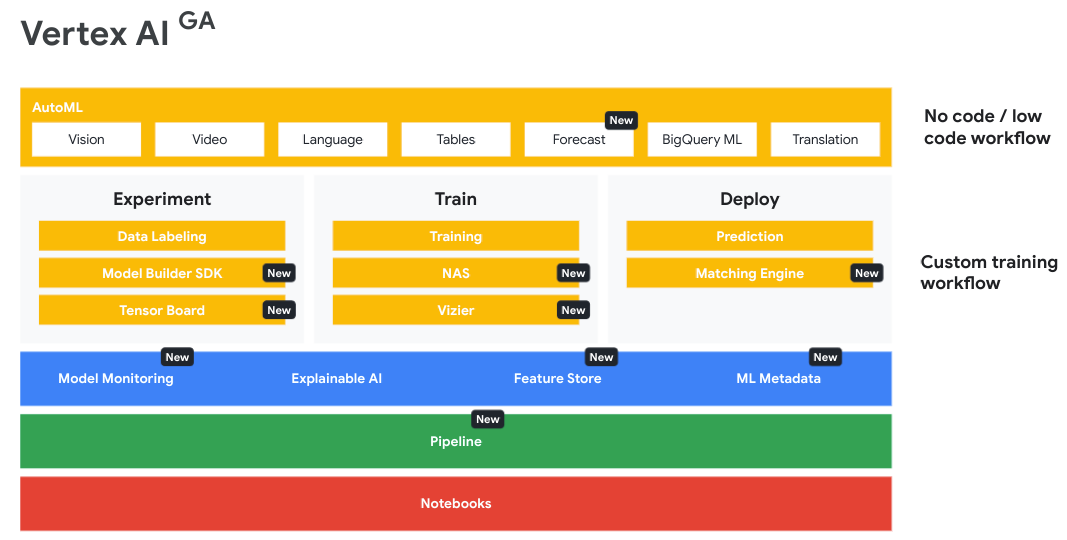

In [17]:
USER = "aburdenko" # @param {type:"string"} <---CHANGE THESE
BUCKET_NAME = "bq_datasets_examples" # @param {type:"string"} <---CHANGE THESE
GOOGLE_CLOUD_PROJECT = "aburdenko-project" # @param {type:"string"} <---CHANGE THESE
REGION = "us-central1" # @param {type:"string"} <---CHANGE THESE
SERVICE_ACCOUNT_ID="vertex-custom-training-sa"

target='/content/drive/MyDrive/Colab Notebooks/lib'
link_name = '/content/notebooks/lib'

%env GOOGLE_CLOUD_PROJECT=$GOOGLE_CLOUD_PROJECT
%env SERVICE_ACCOUNT_ID=$SERVICE_ACCOUNT_ID


env: GOOGLE_CLOUD_PROJECT=aburdenko-project
env: SERVICE_ACCOUNT_ID=vertex-custom-training-sa


In [22]:
import os, sys, errno
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!mkdir -p /content/notebooks/



Mounted at /content/drive


In [23]:
try:    
    os.symlink(target, link_name)
except OSError as e:
    if e.errno == errno.EEXIST:
        os.remove(link_name)
        os.symlink(target, link_name)
    else:
        raise e

In [24]:
import sys
sys.path.insert(0,link_name)

In [ ]:
# install vim
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [6]:
!gcloud config set project $GOOGLE_CLOUD_PROJECT

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey



In [9]:
import sys
if 'google.colab' in sys.modules:
  from google.colab import auth
  auth.authenticate_user()
  print('Authenticated')

Authenticated


In [10]:
!gcloud iam service-accounts create $SERVICE_ACCOUNT_ID  \
    --description="A custom service account for Vertex custom training with Tensorboard" \
    --display-name="Vertex AI Custom Training"

ERROR: (gcloud.iam.service-accounts.create) Resource in projects [aburdenko-project] is the subject of a conflict: Service account vertex-custom-training-sa already exists within project projects/aburdenko-project.
- '@type': type.googleapis.com/google.rpc.ResourceInfo
  resourceName: projects/aburdenko-project/serviceAccounts/vertex-custom-training-sa@aburdenko-project.iam.gserviceaccount.com


In [21]:
!gcloud projects add-iam-policy-binding $GOOGLE_CLOUD_PROJECT \
    --member=serviceAccount:$SERVICE_ACCOUNT_ID@$GOOGLE_CLOUD_PROJECT.iam.gserviceaccount.com \
    --role="roles/storage.admin"

!gcloud projects add-iam-policy-binding $GOOGLE_CLOUD_PROJECT \
    --member=serviceAccount:$SERVICE_ACCOUNT_ID@$GOOGLE_CLOUD_PROJECT.iam.gserviceaccount.com \
    --role="roles/bigquery.admin"

!gcloud projects add-iam-policy-binding $GOOGLE_CLOUD_PROJECT \
    --member=serviceAccount:$SERVICE_ACCOUNT_ID@$GOOGLE_CLOUD_PROJECT.iam.gserviceaccount.com \
    --role="roles/aiplatform.user"

Updated IAM policy for project [aburdenko-project].
bindings:
- members:
  - serviceAccount:service-653488387759@gcp-sa-bigquerydatatransfer.iam.gserviceaccount.com
  - user:aburdenko@google.com
  role: organizations/433637338589/roles/GcsBucketOwner
- members:
  - serviceAccount:653488387759-compute@developer.gserviceaccount.com
  role: roles/aiplatform.admin
- members:
  - serviceAccount:service-653488387759@gcp-sa-aiplatform-cc.iam.gserviceaccount.com
  role: roles/aiplatform.customCodeServiceAgent
- members:
  - serviceAccount:service-653488387759@gcp-sa-aiplatform.iam.gserviceaccount.com
  role: roles/aiplatform.serviceAgent
- members:
  - serviceAccount:653488387759-compute@developer.gserviceaccount.com
  role: roles/aiplatform.user
- members:
  - serviceAccount:service-653488387759@gcp-gae-service.iam.gserviceaccount.com
  role: roles/appengine.serviceAgent
- members:
  - serviceAccount:service-653488387759@gae-api-prod.google.com.iam.gserviceaccount.com
  role: roles/appenginef

In [25]:
!git clone https://github.com/GoogleCloudPlatform/training-data-analyst

Cloning into 'training-data-analyst'...
remote: Enumerating objects: 56658, done.
remote: Counting objects: 100% (1970/1970), done.
remote: Compressing objects: 100% (906/906), done.
remote: Total 56658 (delta 1059), reused 1706 (delta 881), pack-reused 54688
Receiving objects: 100% (56658/56658), 647.90 MiB | 28.18 MiB/s, done.
Resolving deltas: 100% (35745/35745), done.
Checking out files: 100% (12489/12489), done.


In [29]:
!pip install -U -r  /content/training-data-analyst/self-paced-labs/vertex-ai/vertex-ai-qwikstart/requirements.txt

     |████████████████████████████████| 1.3 MB 9.9 MB/s 
     |████████████████████████████████| 96 kB 4.5 MB/s 
     |████████████████████████████████| 243 kB 49.3 MB/s 
     |████████████████████████████████| 106 kB 30.6 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 4.0 MB 46.4 MB/s 
     |████████████████████████████████| 454.3 MB 13 kB/s 
     |████████████████████████████████| 106 kB 58.2 MB/s 
     |████████████████████████████████| 105 kB 58.5 MB/s 
     |████████████████████████████████| 105 kB 50.9 MB/s 
     |████████████████████████████████| 105 kB 45.2 MB/s 
     |████████████████████████████████| 105 kB 3.6 MB/s 
     |████████████████████████████████| 105 kB 48.8 MB/s 
     |████████████████████████████████| 104 kB 40.3 MB/s 
     |████████████████████████████████| 104 kB 43.2 MB/s 
     |████████████████████████████████| 103 kB 41.1 MB/s 
     |████████████████████████████████| 103 kB 48.8 MB/s 
     |██████████████